# Imports

In [3]:
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

# Data load and Preprocessing

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
image_size = x_train.shape[1]
print(image_size)

28


In [8]:
print(x_train.shape)
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [11]:
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
dropout = .4
n_filters = 32

# Left Leaf

In [13]:
left_inputs = Input(shape = input_shape)
x = left_inputs
filters = n_filters

for i in range(3):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding='same', activation='relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filters *= 2

# Right Leaf

In [15]:
right_inputs = Input(shape = input_shape)
y = right_inputs
filters = n_filters

for i in range(3):
    y = Conv2D(filters=filters, kernel_size=kernel_size,padding='same',activation='relu',dilation_rate=2)(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *= 2

# Merge

In [16]:
y = concatenate([x, y])
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

In [19]:
model = Model([left_inputs, right_inputs], outputs)
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 28, 28, 32)   320         input_5[0][0]                    
_______________________________________________________________________________________

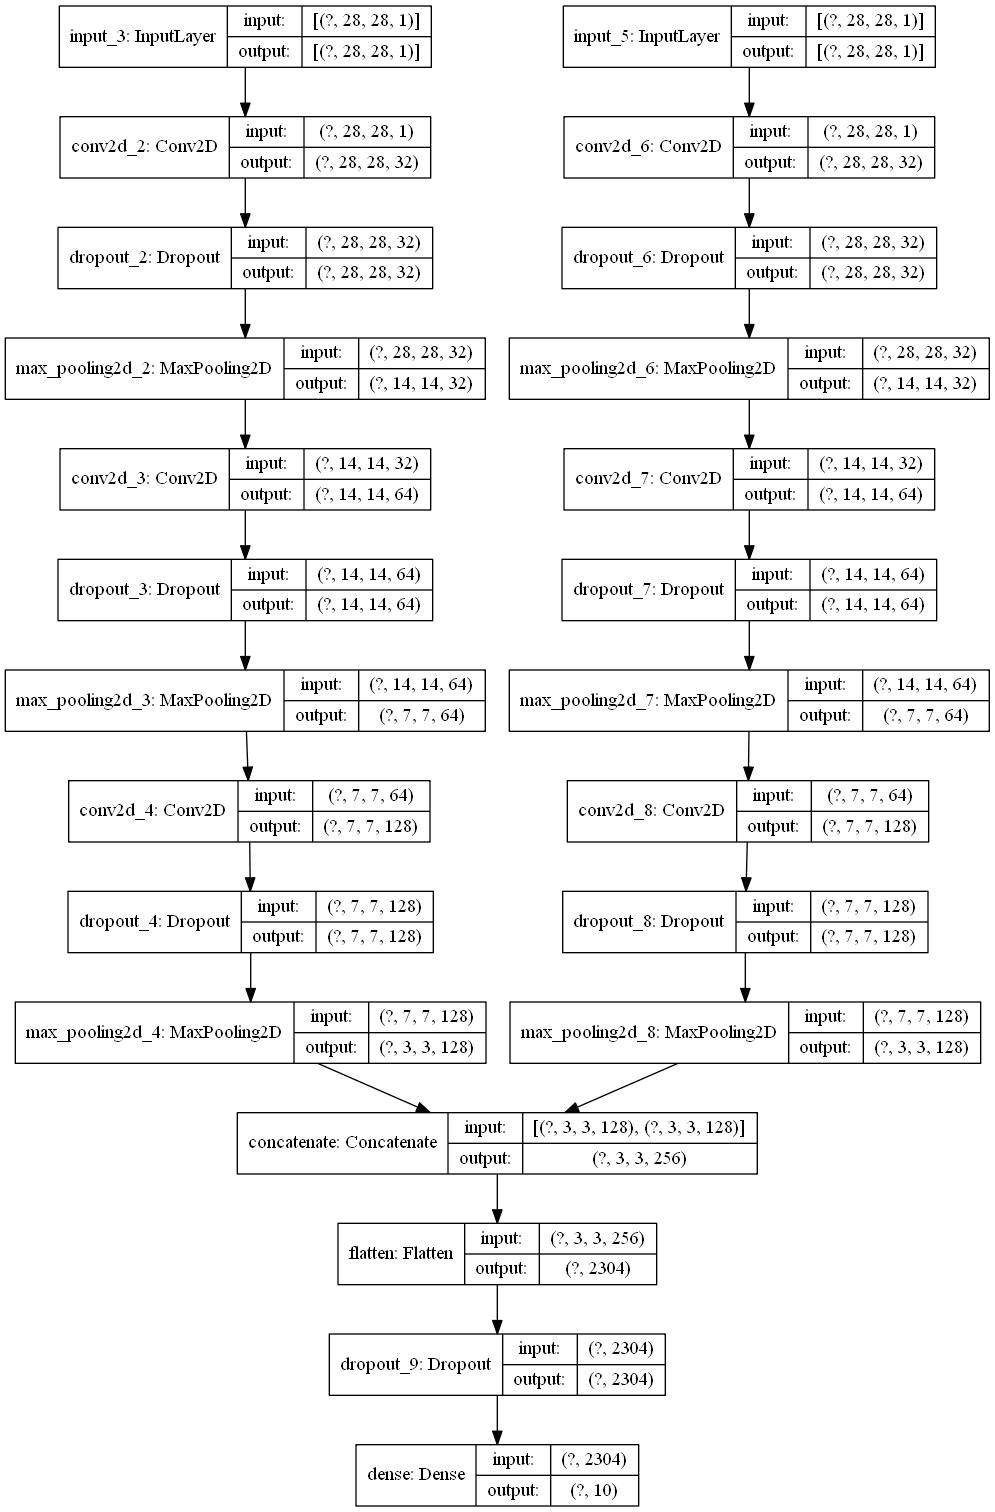

In [20]:
plot_model(model, show_shapes=True)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit([x_train, x_train], y_train, validation_data=([x_test, x_test], y_test), epochs=20, batch_size=batch_size)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1755 - accuracy: 0.9440 - val_loss: 0.1799 - val_accuracy: 0.9761
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.1190 - val_accuracy: 0.9893
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.0845 - val_accuracy: 0.9916
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0638 - val_accuracy: 0.9918
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0510 - val_accuracy: 0.9930
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0919 - val_accuracy: 0.9911
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0509 - val_ac

In [23]:
score = model.evaluate([x_test, x_test], y_test, batch_size=batch_size)
print('\nTest Accuracy: %.1f%%' % (100.0 * score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0409 - accuracy: 0.9933

Test Accuracy: 99.3%
